In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/craiglist_cville_cars_long.csv')
df.head()

,Unnamed: 0,title,price,year,link,brand,age,log_price,log_age,title.1,year_post,condition,cylinders,drivetrain,fuel,miles,color,transmission,bodytype,text
0,0,2005 hyundai elantra,1200,2005.0,https://charlottesville.craigslist.org/cto/d/a...,missing,20.0,7.090077,2.995732,title,2005,fair,4 cylinders,fwd,gas,232450,silver,manual,sedan,‘05 Elantra runs good but did not pass inspect...
1,1,2007 f250 king ranch,17500,2007.0,https://charlottesville.craigslist.org/cto/d/w...,missing,18.0,9.769956,2.890372,title,2007,good,8 cylinders,4wd,diesel,148086,missing,automatic,pickup,"6.0 diesel, bulletproofed, just replaced trans..."
2,2,1997 dodge 2500 4x4 cummins,9500,1997.0,https://charlottesville.craigslist.org/cto/d/l...,dodge,28.0,9.159047,3.332205,title,1997,fair,6 cylinders,4wd,diesel,179000,red,automatic,truck,1997 Dodge 4x4 Cummins. Adult owned and driven...
3,3,1999 honda civic 4 cyl manual transmission,1000,1999.0,https://charlottesville.craigslist.org/cto/d/c...,honda,26.0,6.907755,3.258097,title,1999,salvage,4 cylinders,rwd,gas,195338,silver,manual,sedan,"Vehicle does start and run, it has a manual tr..."
4,4,"1998 gmc sierra 1500 sl truck auto rwd <103,00...",6250,1998.0,https://charlottesville.craigslist.org/cto/d/l...,gmc,27.0,8.740337,3.295837,title,1998,good,8 cylinders,rwd,gas,102483,missing,automatic,truck,"1998 GMC Sierra 1500 SL Truck, Auto 2WD/RWD, V..."


<Axes: xlabel='price', ylabel='Density'>

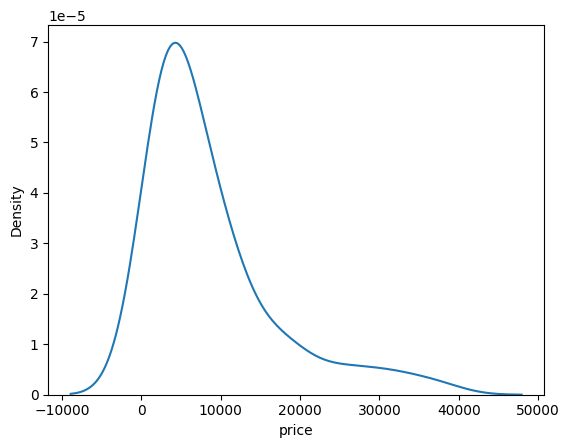

In [4]:
sns.kdeplot(df['price'])

In [5]:
df['price'].describe()

count       92.000000
mean      8589.706522
std       8170.544206
min       1000.000000
25%       3187.500000
50%       5650.000000
75%      10625.000000
max      38000.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Proportion'>

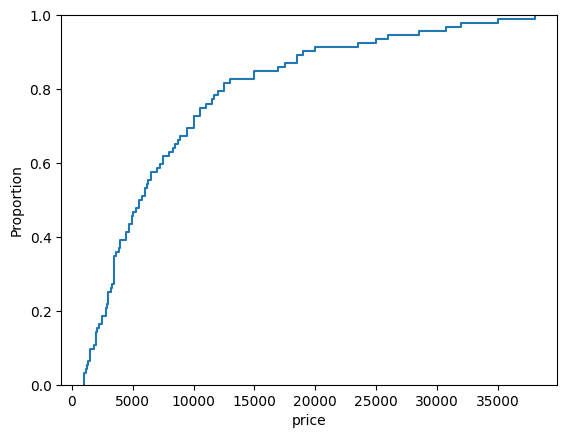

In [6]:
sns.ecdfplot(df['price'])

In [9]:
np.quantile(df['price'], 0.75)

np.float64(10625.0)

<Axes: xlabel='price'>

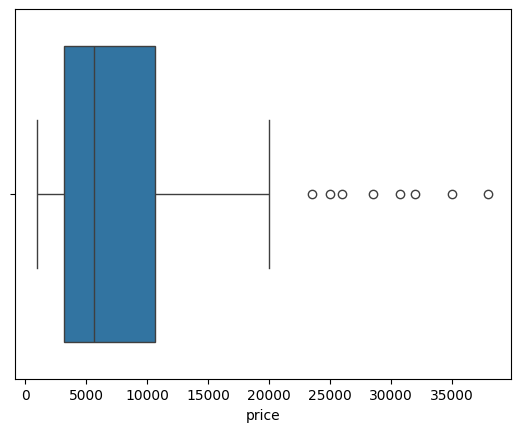

In [11]:
sns.boxplot(x=df['price'])

In [12]:
def outlier_analyze(x):
    q75 = np.quantile(x, 0.75)
    q25 = np.quantile(x, 0.25)
    iqr = q75 - q25
    uw = q75 + 1.5 * iqr
    lw = q25 - 1.5 * iqr
    upper_outlier = (x>uw).astype(int)
    lower_outlier = (x<lw).astype(int)
    outlier = upper_outlier + lower_outlier
    winsorize = (
        upper_outlier * uw +
        lower_outlier * lw +
        (1-outlier) * x
    )
    return outlier, winsorize

<Axes: xlabel='price', ylabel='price'>

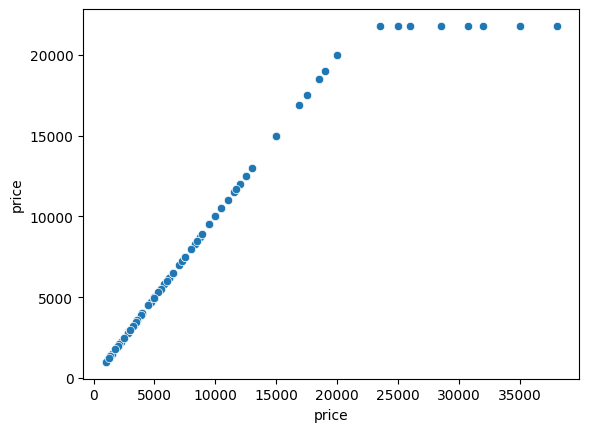

In [16]:
x = df['price']
outlier, winsorize = outlier_analyze(x)
sns.scatterplot(x=x, y=winsorize)

<Axes: xlabel='price'>

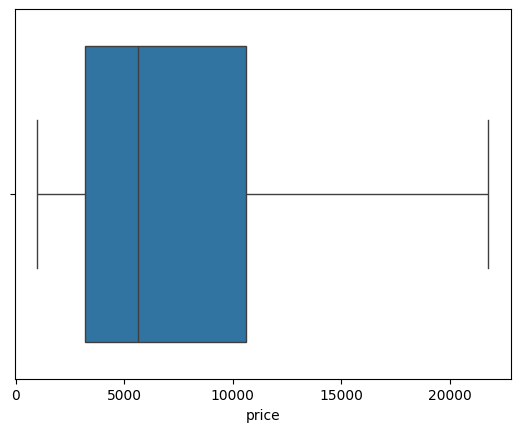

In [20]:
sns.boxplot(x=winsorize)

<Axes: xlabel='price'>

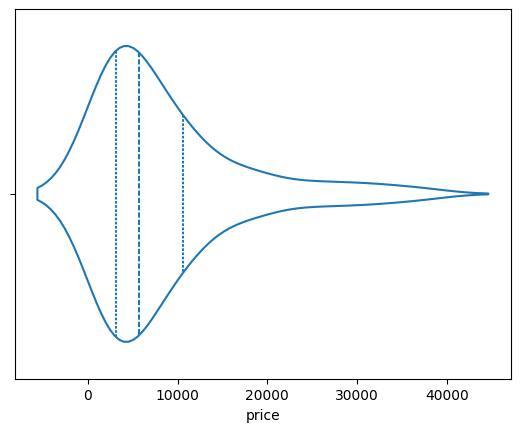

In [24]:
sns.violinplot(x=x, fill=False, inner='quart')